[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[*********************100%%**********************]  1 of 1 completed
                           Open        High         Low       Close  \
Datetime                                                              
2024-01-02 09:30:00  250.080002  250.899994  244.410004  248.794006   
2024-01-02 10:00:00  248.779999  251.250000  248.050003  249.610001   
2024-01-02 10:30:00  249.600006  249.638199  246.820007  248.919998   
2024-01-02 11:00:00  248.899994  250.259995  248.339996  250.000000   
2024-01-02 11:30:00  249.994095  251.000000  249.900101  250.475403   
...                         ...         ...         ...         ...   
2024-01-26 13:30:00  183.490097  183.630005  182.291000  182.644394   
2024-01-26 14:00:00  182.654999  182.660004  182.100006  182.280106   
2024-01-26 14:30:00  182.300003  183.380005  182.119995  183.270004   
2024-01-26 15:00:00  183.270004  183.320007  182.380005  182.630005   
2024-01-26 15:30:00  182.629898  183.470001  182.610001  183.229904   

       

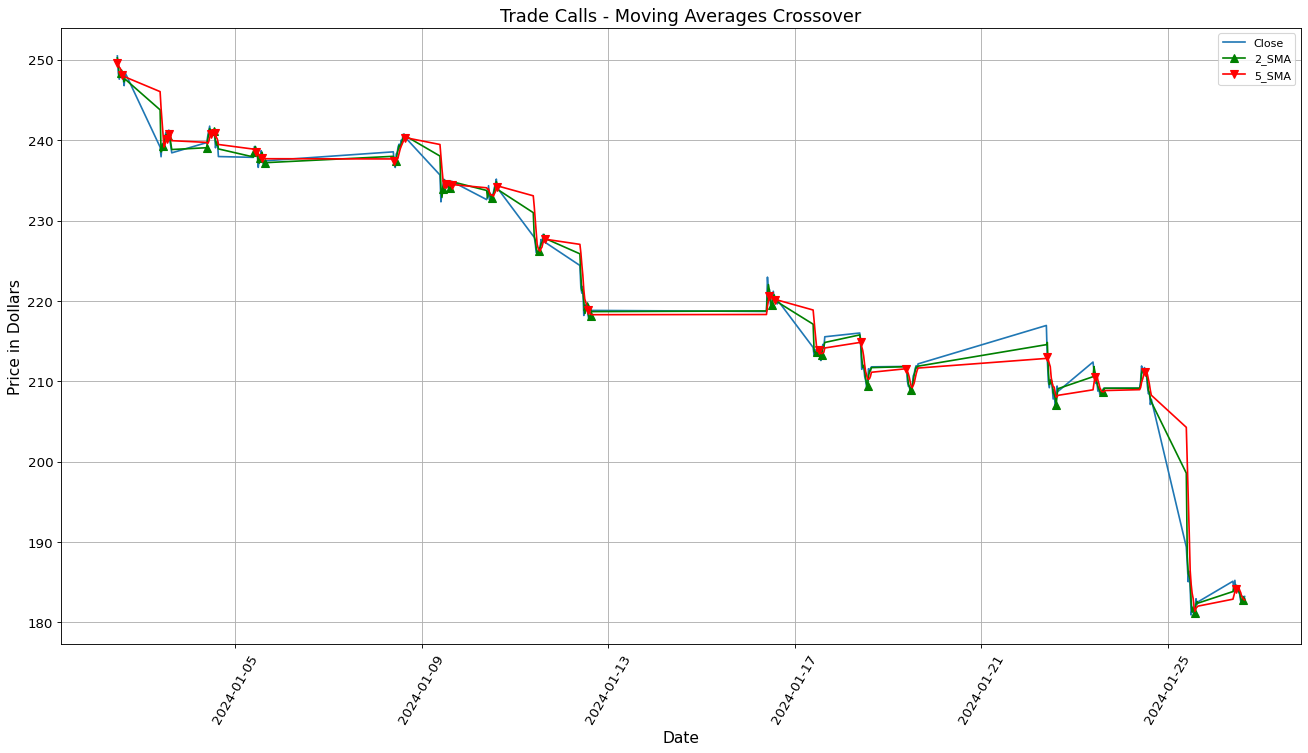

In [1]:
import pandas as pd
import requests 
from finVADER import finvader
import matplotlib.pyplot as plt
from pyfile.scrapestockdata import data_tsla, Trade_Buy, Trade_Sell

In [2]:
news_df = pd.read_csv('tsla_future.csv')

final_news = news_df.loc[:,['date','comment_text']]
final_news['date'] = pd.to_datetime(final_news['date'])
final_news.sort_values(by='date',inplace=True)
final_news

,date,comment_text
430,2024-01-03 09:26:37,Bullish on $Lunr
442,2024-01-04 19:23:34,Sounds similar to my strategy. Except I buy th...
432,2024-01-04 19:27:57,No thanks... We'll all turn to stone.
444,2024-01-08 14:49:47,Agreed. Not worth our time
366,2024-01-09 06:32:18,[deleted]
...,...,...
256,2024-01-30 10:08:37,Tesla haters is basically a cult in itself. An...
202,2024-01-30 10:09:18,"And the scary thing is, they can be worth mult..."
209,2024-01-30 10:10:38,Yes you sold. Easy now to be on the flip side....
664,2024-01-30 13:27:24,"Lol, I Day traded today tsla to the long side ..."


In [3]:
# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

In [4]:
 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["date"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)

final_news['compound_finvader_score'] = final_news['comment_text'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_35964\2594099848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
C:\Users\DELL\AppData\Local\Temp\ipykernel_35964\2594099848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['compound_finvader_score'] = final_news['comment_text'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")


,date,comment_text,trading_time,Date,compound_finvader_score
430,2024-01-03 09:26:37,Bullish on $Lunr,2024-01-03 13:30:00,2024-01-03,-0.0090
366,2024-01-09 06:32:18,[deleted],2024-01-09 13:30:00,2024-01-09,0.0000
369,2024-01-09 06:39:54,It is dangerous to bet against for sure. Right...,2024-01-09 13:30:00,2024-01-09,-0.7665
382,2024-01-09 06:41:59,The timing is just hard. Could you eventually ...,2024-01-09 13:30:00,2024-01-09,0.3500
367,2024-01-09 06:44:29,This might be the worst analysis I’ve seen lol...,2024-01-09 13:30:00,2024-01-09,0.0798
...,...,...,...,...,...
1456,2024-01-30 09:58:07,honestly elon laughing on the earnings call wa...,2024-01-30 13:30:00,2024-01-30,0.7367
256,2024-01-30 10:08:37,Tesla haters is basically a cult in itself. An...,2024-01-30 13:30:00,2024-01-30,-0.4888
202,2024-01-30 10:09:18,"And the scary thing is, they can be worth mult...",2024-01-30 13:30:00,2024-01-30,-0.0052
209,2024-01-30 10:10:38,Yes you sold. Easy now to be on the flip side....,2024-01-30 13:30:00,2024-01-30,-0.3105


In [5]:
# final_news['compound_finvader_score'] = cs
final_news = final_news[(final_news[['compound_finvader_score']] != 0).all(axis=1)].reset_index(drop=True)
final_news

,date,comment_text,trading_time,Date,compound_finvader_score
0,2024-01-03 09:26:37,Bullish on $Lunr,2024-01-03 13:30:00,2024-01-03,-0.0090
1,2024-01-09 06:39:54,It is dangerous to bet against for sure. Right...,2024-01-09 13:30:00,2024-01-09,-0.7665
2,2024-01-09 06:41:59,The timing is just hard. Could you eventually ...,2024-01-09 13:30:00,2024-01-09,0.3500
3,2024-01-09 06:44:29,This might be the worst analysis I’ve seen lol...,2024-01-09 13:30:00,2024-01-09,0.0798
4,2024-01-09 06:50:01,Market is very irrational on this company. Hon...,2024-01-09 13:30:00,2024-01-09,0.1448
...,...,...,...,...,...
2324,2024-01-30 09:58:07,honestly elon laughing on the earnings call wa...,2024-01-30 13:30:00,2024-01-30,0.7367
2325,2024-01-30 10:08:37,Tesla haters is basically a cult in itself. An...,2024-01-30 13:30:00,2024-01-30,-0.4888
2326,2024-01-30 10:09:18,"And the scary thing is, they can be worth mult...",2024-01-30 13:30:00,2024-01-30,-0.0052
2327,2024-01-30 10:10:38,Yes you sold. Easy now to be on the flip side....,2024-01-30 13:30:00,2024-01-30,-0.3105


In [6]:
#Retaining extreme (max and min) compound scores for same Day news headlines
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_finvader_score"].max() > 0:
        max_cs.append(data["compound_finvader_score"].max())
    elif data["compound_finvader_score"].max() < 0:
        max_cs.append(0)

    if data["compound_finvader_score"].min() < 0:
        min_cs.append(data["compound_finvader_score"].min())
    elif data["compound_finvader_score"].min() > 0:
        min_cs.append(0)

In [7]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

#summing and calculating finVader score
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores
extreme_scores_df

,Date,max_scores,min_scores,final_scores
0,2024-01-03,0.0000,-0.0090,-0.0090
1,2024-01-09,0.4651,-0.7665,-0.3014
2,2024-01-10,0.4327,-0.8335,-0.4008
3,2024-01-11,0.5163,-0.7148,-0.1985
4,2024-01-15,0.7162,0.0000,0.7162
5,2024-01-16,0.8592,-0.8192,0.0400
6,2024-01-17,0.7506,-0.8191,-0.0685
7,2024-01-18,0.1706,-0.3100,-0.1394
8,2024-01-19,0.7419,-0.7184,0.0235
9,2024-01-22,0.9249,-0.8483,0.0766


In [8]:
#Using final compound finVADER scores with threshold to generate trade calls
# finVADER trade calls - with threshold
finvader_Buy=[]
finvader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.33:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.33:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

finvader_buy = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Buy:
        finvader_buy.append(i)

finvader_sell = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Sell:
        finvader_sell.append(i)

print(finvader_buy)
print(finvader_sell)

Trade Call for 2024-01-10 is Sell.
Trade Call for 2024-01-15 is Buy.
Trade Call for 2024-01-24 is Sell.
[]
[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]


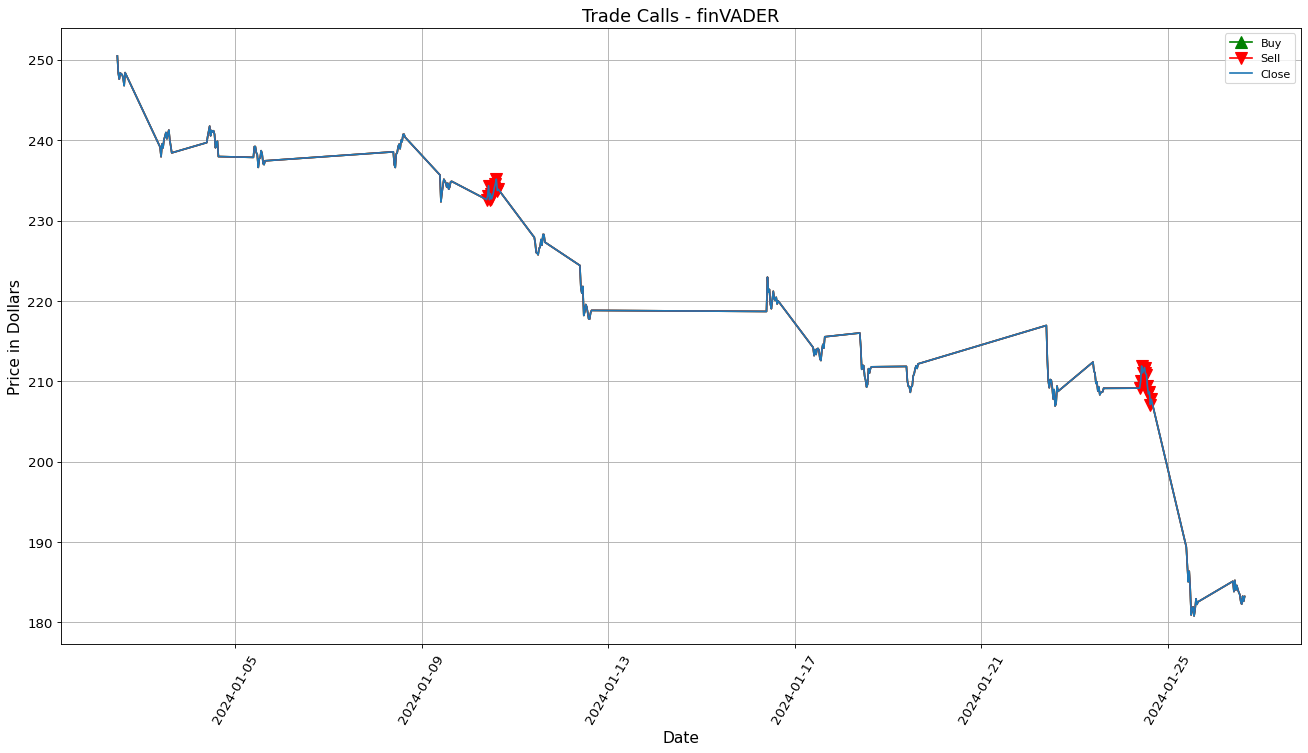

In [9]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=finvader_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=finvader_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - finVADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show()

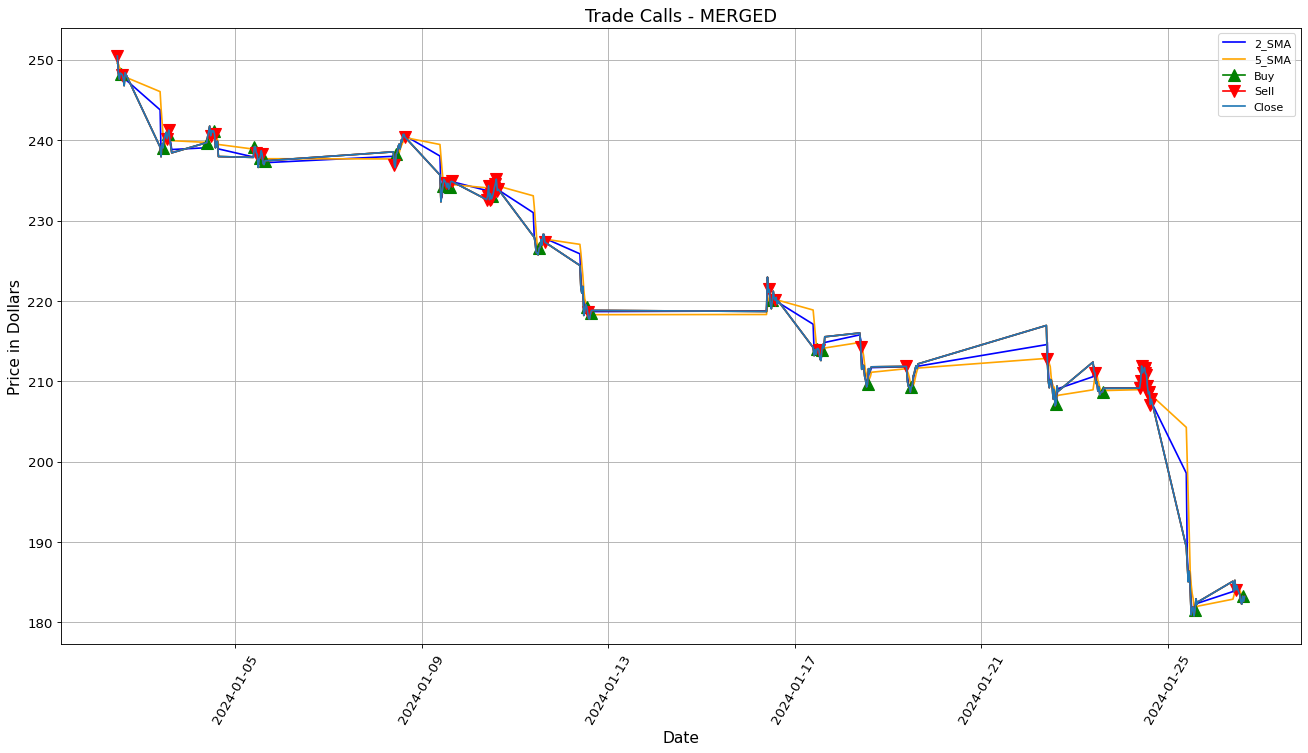

In [10]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + finvader_buy) - set(Trade_Sell))
final_sell = list(set(Trade_Sell + finvader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['2_SMA'], color='blue')
plt.plot(data_tsla.index, data_tsla['5_SMA'], color='orange')
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=final_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=final_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show()

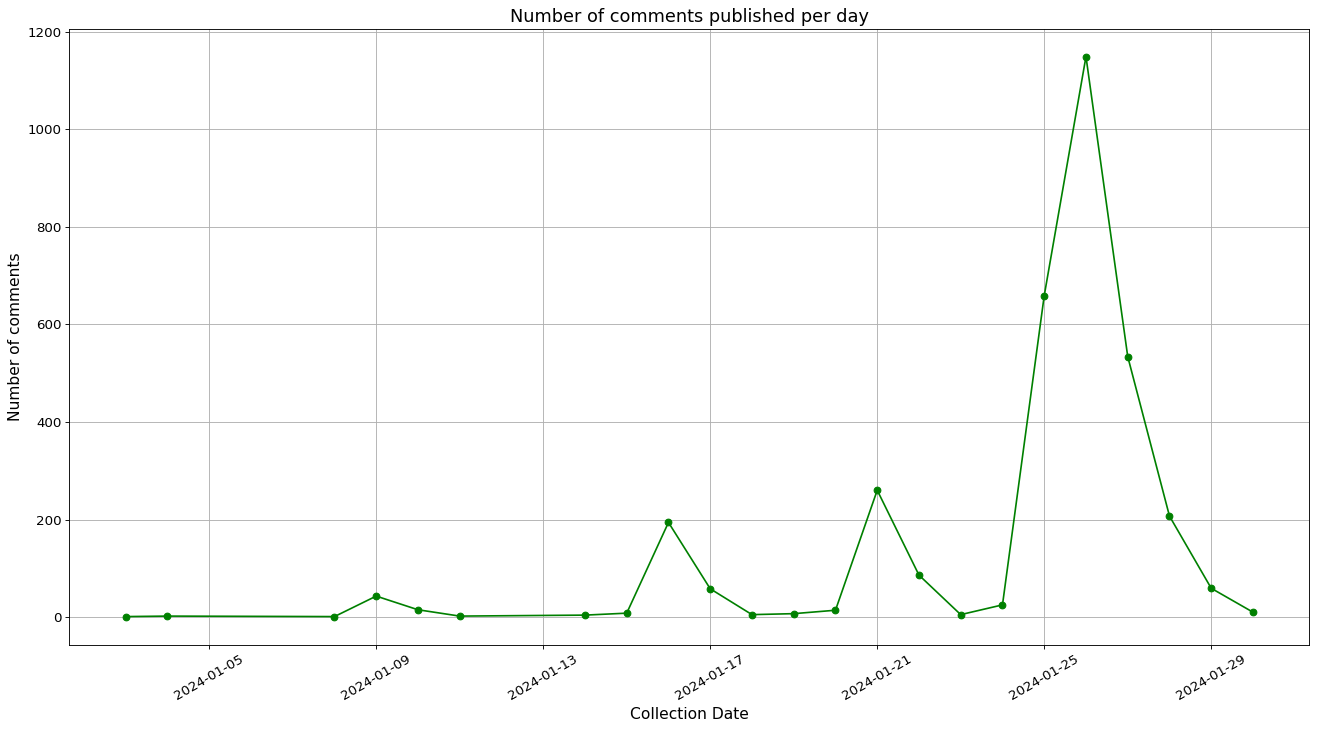

In [11]:
import matplotlib.pyplot as plt

# Đảm bảo rằng cột 'date' là kiểu dữ liệu datetime
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['Date'] = news_df['date'].dt.date

# Tính toán số lượng content mỗi ngày
content_count = news_df.groupby('Date').size()

# Vẽ biểu đồ
plt.figure(figsize=(20,10), dpi=80)
content_count.plot(kind='line', marker='o', color='green')
plt.title('Number of comments published per day', fontsize = 16)
plt.xlabel('Collection Date', fontsize=14)
plt.ylabel('Number of comments',fontsize = 14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

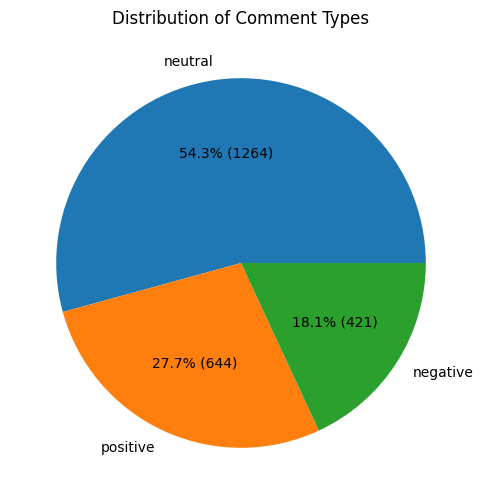

In [12]:
# Phân loại comment
final_news['comment_type'] = final_news['compound_finvader_score'].apply(lambda x: 'positive' if x > 0.33 
                                                                         else ('negative' if x < -0.33 
                                                                        else 'neutral'))

# Đếm số lượng comment cho mỗi loại
comment_counts = final_news['comment_type'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
comment_counts.plot.pie(autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*comment_counts.sum()))
plt.title('Distribution of Comment Types')
plt.ylabel('')
plt.show()

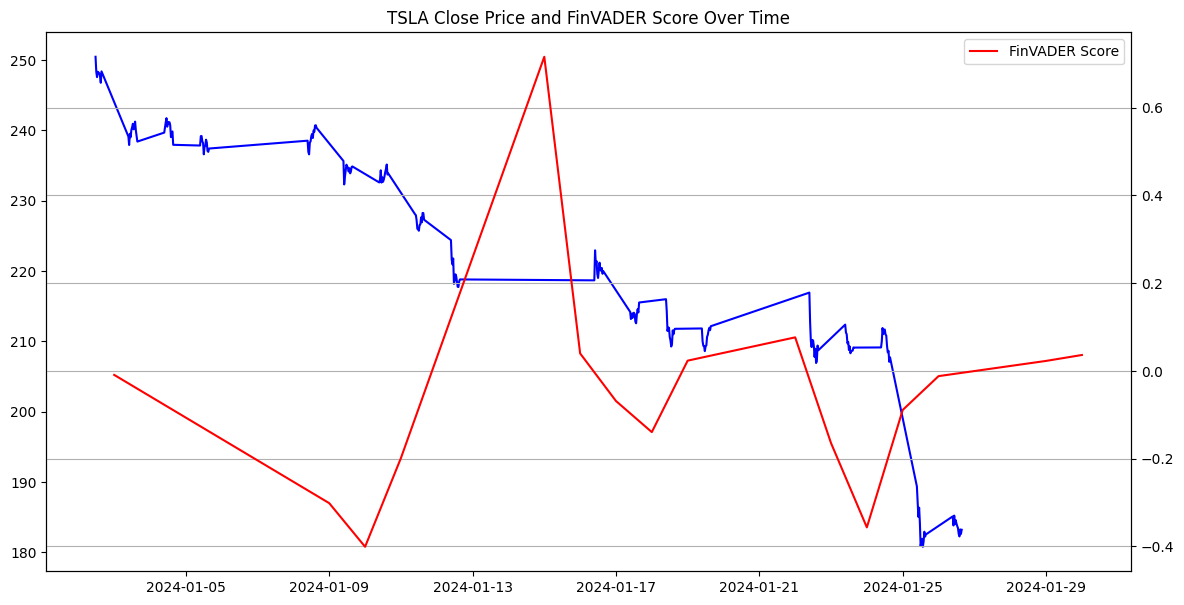

In [13]:
data_tsla = data_tsla.reset_index()
# Đảm bảo rằng cả hai DataFrame đều được sắp xếp theo 'Date' và đặt 'Date' làm index
data_tsla = data_tsla.sort_values('Datetime').set_index('Datetime')
extreme_scores_df = extreme_scores_df.sort_values('Date').set_index('Date')



# Vẽ biểu đồ đường cho giá đóng cửa
plt.figure(figsize=(14, 7))
plt.plot(data_tsla['Close'], label='TSLA Close Price', color='blue')

# Vẽ biểu đồ đường cho điểm FinVADER
# Chúng ta sử dụng plt.twinx() để vẽ biểu đồ trên cùng một hình nhưng với hai trục y khác nhau
plt.twinx()
plt.plot(extreme_scores_df['final_scores'], label='FinVADER Score', color='red')

plt.title('TSLA Close Price and FinVADER Score Over Time')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Chuyển đổi 'Datetime' và 'Date' thành cùng một định dạng ngày
data_tsla.index = data_tsla.index.date
extreme_scores_df.index = pd.to_datetime(extreme_scores_df.index).date

# Tính toán hệ số tương quan
correlation = data_tsla['Close'].corr(extreme_scores_df['final_scores'],method='pearson')

print(f"The correlation between the TSLA Close Price and the FinVADER Score is {correlation}")

The correlation between the TSLA Close Price and the FinVADER Score is -0.3303702733355102
